In [309]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

In [140]:
df = pd.read_csv(r"C:\Users\Lenovo\Desktop\gui prj\nobel_prize_data.csv")
df.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   year                   962 non-null    int64 
 1   category               962 non-null    object
 2   prize                  962 non-null    object
 3   motivation             874 non-null    object
 4   prize_share            962 non-null    object
 5   laureate_type          962 non-null    object
 6   full_name              962 non-null    object
 7   birth_date             934 non-null    object
 8   birth_city             931 non-null    object
 9   birth_country          934 non-null    object
 10  birth_country_current  934 non-null    object
 11  sex                    934 non-null    object
 12  organization_name      707 non-null    object
 13  organization_city      707 non-null    object
 14  organization_country   708 non-null    object
 15  ISO                    

In which year the first Nobel Prize awarded?

In [142]:
df.year.min()

1901

Which year is the latest included in the dataset?

In [143]:
df.year.max()

2020

Are there any duplicates in the dataset?

In [144]:
df.duplicated().values.any()

False

Are there any NaN values?

In [145]:
df.isna().values.any()

True

NaN values per column

In [146]:
df.isna().sum().sort_values(ascending=False)

organization_name        255
organization_city        255
organization_country     254
motivation                88
birth_city                31
birth_date                28
birth_country             28
birth_country_current     28
sex                       28
ISO                       28
year                       0
category                   0
prize                      0
prize_share                0
laureate_type              0
full_name                  0
dtype: int64

Filtering on the nan values in the birth date column we see that we have a bunch of organizations like EU and WFP that were awarded with the prize

In [147]:
df[df.birth_date.isna()].tail()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
860,2012,Peace,The Nobel Peace Prize 2012,"""for over six decades contributed to the advan...",1/1,Organization,European Union (EU),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
873,2013,Peace,The Nobel Peace Prize 2013,"""for its extensive efforts to eliminate chemic...",1/1,Organization,Organisation for the Prohibition of Chemical W...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
897,2015,Peace,The Nobel Peace Prize 2015,"""for its decisive contribution to the building...",1/1,Organization,National Dialogue Quartet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
919,2017,Peace,The Nobel Peace Prize 2017,“for its work to draw attention to the catastr...,1/1,Organization,International Campaign to Abolish Nuclear Weap...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
958,2020,Peace,The Nobel Peace Prize 2020,"“for its efforts to combat hunger, for its con...",1/1,Organization,World Food Programme (WFP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Men and Women Laureates in Different Fields

In [302]:
sex = df.groupby('sex').prize.count().sort_values(ascending=False)

px.pie(sex, names=sex.index, values=sex.values)


In [289]:
cat_men_women = df.groupby(['category', 'sex'], 
                               as_index=False).agg({'prize': pd.Series.count})
cat_men_women.sort_values('prize', ascending=False, inplace=True)

fig = px.bar(cat_men_women, x='category', y='prize', color='sex')
fig.show()

Convert the birth_date column into datetime object

In [150]:
df.birth_date = pd.to_datetime(df.birth_date)

Add a Column called share_pct which has the laureates' share as a percentage

In [151]:
df["share_pct"] = [round(100 / int(df.prize_share[i][2]), 1) for i in df.index]
df.tail(3)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
959,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Andrea Ghez,1965-06-16,"New York, NY",United States of America,United States of America,Female,University of California,"Berkeley, CA",United States of America,USA,25.0
960,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Reinhard Genzel,1952-03-24,Bad Homburg vor der Höhe,Germany,Germany,Male,University of California,"Los Angeles, CA",United States of America,DEU,25.0
961,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery that black hole formation i...,1/2,Individual,Roger Penrose,1931-08-08,Colchester,United Kingdom,United Kingdom,Male,University of Oxford,Oxford,United Kingdom,GBR,50.0


The first three women laureates and their birth countries

In [173]:
first_3 = df[['full_name', 'birth_country']][df.sex == 'Female'].head(3)
first_3

,full_name,birth_country
18,"Marie Curie, née Sklodowska",Russian Empire (Poland)
29,"Baroness Bertha Sophie Felicita von Suttner, n...",Austrian Empire (Czech Republic)
51,Selma Ottilia Lovisa Lagerlöf,Sweden


What did they win the prize for?

In [168]:
motivation_3 = df.motivation[df.sex == 'Female'].head(3)
motivation_3.values

array(['"in recognition of the extraordinary services they have rendered by their joint researches on the radiation phenomena discovered by Professor Henri Becquerel"',
       nan,
       '"in appreciation of the lofty idealism, vivid imagination and spiritual perception that characterize her writings"'],
      dtype=object)

Did some people or organizations get the Nobel Prize more than once?

In [280]:
df[df.full_name.duplicated(keep=False)]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL,25.0
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,Sorbonne University,Paris,France,POL,100.0
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0
278,1954,Chemistry,The Nobel Prize in Chemistry 1954,"""for his research into the nature of the chemi...",1/1,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",United States of America,United States of America,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,USA,100.0
283,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,Organization,Office of the United Nations High Commissioner...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0
297,1956,Physics,The Nobel Prize in Physics 1956,"""for their researches on semiconductors and th...",1/3,Individual,John Bardeen,1908-05-23,"Madison, WI",United States of America,United States of America,Male,University of Illinois,"Urbana, IL",United States of America,USA,33.3
306,1958,Chemistry,The Nobel Prize in Chemistry 1958,"""for his work on the structure of proteins, es...",1/1,Individual,Frederick Sanger,1918-08-13,Rendcombe,United Kingdom,United Kingdom,Male,University of Cambridge,Cambridge,United Kingdom,GBR,100.0
340,1962,Peace,The Nobel Peace Prize 1962,NaN,1/1,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",United States of America,United States of America,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,USA,100.0
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,Organization,Comité international de la Croix Rouge (Intern...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0


the Nobel Prize by the Birt Countries and Cities of the Laureates

The first 20 cities where the laureates were born most

In [241]:
cities = df.groupby('birth_city').prize.count().sort_values(ascending=False)[:20]
fig = px.pie(cities, names=cities.index, values=cities.values)
fig.show()

Prizes by Categories

In [283]:
categories = df.category.value_counts()

bar = px.bar(categories, x=categories.index, y=categories.values)
bar.update_layout(xaxis_title='Nobel Prize Category', 
                    coloraxis_showscale=False,
                    yaxis_title='Number of Prizes')

When was the first prize in the field of Economics awarded?

In [255]:
df.year[df.category == 'Economics'].values[0]

1969

Number of Prizes Awarded over Time

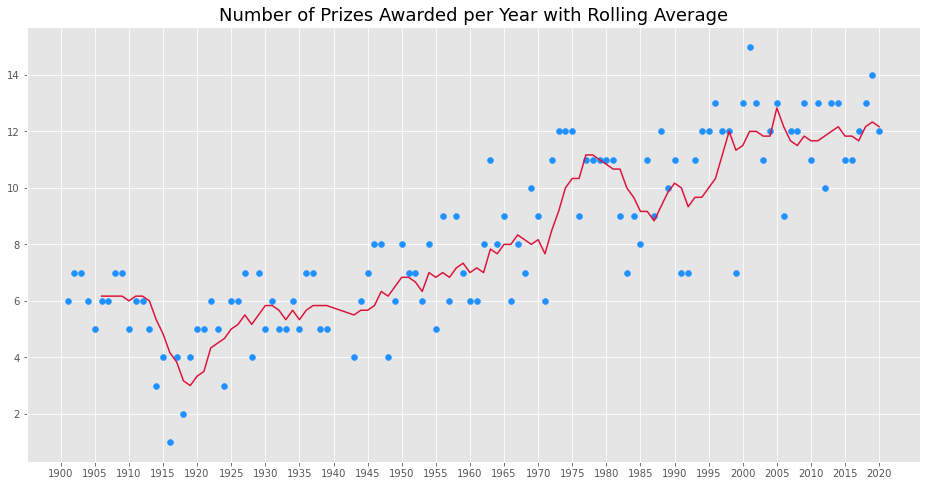

In [345]:
prize_by_years = df.groupby('year').agg({'prize': pd.Series.count})
mean_average = prize_by_years.rolling(window=6).mean()

plt.figure(figsize=(16,8))
plt.style.use('ggplot')
plt.title('Number of Prizes Awarded per Year with Rolling Average', fontsize=18)

ax = plt.gca()

ax.scatter(prize_by_years.index, prize_by_years.values, c='dodgerblue')
plt.plot(mean_average.index, mean_average.values, c='crimson')

interval = np.arange(1900, 2021, step=5)

plt.xticks(ticks=interval);

Prize Ranking by Country

In [382]:
top_countries = df.groupby(['birth_country_current'], 
                                  as_index=False).agg({'prize': pd.Series.count})
 
top_countries.sort_values(by='prize', inplace=True)
top20_countries = top_countries[-20:]

h_bar = px.bar(x=top20_countries.prize,
               y=top20_countries.birth_country_current,
               orientation='h',
               color=top20_countries.prize,
               color_continuous_scale='Viridis',
               title='Top 20 Countries by Number of Prizes')
 
h_bar.update_layout(xaxis_title='Number of Prizes', 
                    yaxis_title='Country',
                    coloraxis_showscale=False)
h_bar.show()

In [396]:
countries =  df.groupby(['birth_country_current', 'ISO'], as_index=False).agg({'prize':pd.Series.count})

fig = px.choropleth(countries, locations="ISO",
                    color=countries.prize, 
                    hover_name=countries.birth_country_current, 
                    color_continuous_scale="Viridis",
                   range_color=(0,120))

fig.update_layout(coloraxis_showscale=True,)
fig.show()